<a href="https://colab.research.google.com/github/RodrigoBarbosaa/Flight_Status_Prediction/blob/main/voos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Flight delay analysis**

In this project, we intend to use data analytics to find the correlation existent between flight delays (specific to 2021's USA flight data) and multiple factors, especially during high season for travelling, where there is an increased demand for flight booking. This is part of the Introdutcion to Data Science (Advanced Topics in Data and Information Management) course, by Luciano Barbosa at CIn, Federal University of Pernambuco.

## Who are we?
[Mariana Amorim](https://github.com/mrbsa) and [Rodrigo Barbosa](https://github.com/RodrigoBarbosaa), students of Information Systems @ Centro de Informática, UFPE, and data enthusiasts.

## Sources

The database is a courtesy of Rob Mulla @ Kaggle. You can find it [here](https://www.kaggle.com/datasets/robikscube/flight-delay-dataset-20182022/data?select=readme.md).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importando o Dataset e Bibliotecas

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from scipy.stats import zscore

In [ ]:
pip install scikit-learn

In [ ]:
flights = pd.read_csv("/content/drive/MyDrive/Combined_Flights_2021 2.csv", encoding = "ISO-8859-1")

In [ ]:
flights.head(5)

,Airline,FlightDate,Month,DayofMonth,DayOfWeek,Origin,OriginCityName,Dest,DestCityName,DepDelayMinutes,ArrDelayMinutes,Cancelled,CRSDepTime,DepTime,CRSElapsedTime,ActualElapsedTime,CRSArrTime,ArrTime
0,SkyWest Airlines Inc.,2021-03-03,3,3,3,SGU,"St. George, UT",PHX,"Phoenix, AZ",0.0,0.0,False,724,714.0,79.0,64.0,843,818.0
1,SkyWest Airlines Inc.,2021-03-03,3,3,3,PHX,"Phoenix, AZ",SGU,"St. George, UT",0.0,0.0,False,922,917.0,78.0,74.0,1040,1031.0
2,SkyWest Airlines Inc.,2021-03-03,3,3,3,MHT,"Manchester, NH",ORD,"Chicago, IL",0.0,0.0,False,1330,1321.0,180.0,160.0,1530,1501.0
3,SkyWest Airlines Inc.,2021-03-03,3,3,3,DFW,"Dallas/Fort Worth, TX",TRI,"Bristol/Johnson City/Kingsport, TN",0.0,0.0,False,1645,1636.0,145.0,146.0,2010,2002.0
4,SkyWest Airlines Inc.,2021-03-03,3,3,3,PHX,"Phoenix, AZ",BFL,"Bakersfield, CA",0.0,0.0,False,1844,1838.0,101.0,85.0,1925,1903.0


In [ ]:
print(flights.columns)

Index(['Airline', 'FlightDate', 'Month', 'DayofMonth', 'DayOfWeek', 'Origin',
       'OriginCityName', 'Dest', 'DestCityName', 'DepDelayMinutes',
       'ArrDelayMinutes', 'Cancelled', 'CRSDepTime', 'DepTime',
       'CRSElapsedTime', 'ActualElapsedTime', 'CRSArrTime', 'ArrTime'],
      dtype='object')


# Filtrando o Dataset para análise

Como queremos trabalhar com a probabilidade de um voo atrasar na saída (Depature) e fornecer esse tempo de atraso, decidimos filtrar apenas as colunas envolvidas para análise. Nesse caso, são: **'Airline', 'FlightDate', 'Month', 'DayofMonth', 'DayOfWeek', 'Origin','OriginCityName', 'DestCityName', 'Dest', 'DepDelayMinutes', 'Cancelled' **

In [ ]:
depature_db = flights[['Airline', 'FlightDate', 'Month', 'DayofMonth', 'DayOfWeek', 'Origin', 'OriginCityName', 'Dest', 'DestCityName', 'DepDelayMinutes', 'Cancelled' ]]

In [ ]:
depature_db.head(10)

,Airline,FlightDate,Month,DayofMonth,DayOfWeek,Origin,OriginCityName,Dest,DestCityName,DepDelayMinutes,Cancelled
0,SkyWest Airlines Inc.,2021-03-03,3,3,3,SGU,"St. George, UT",PHX,"Phoenix, AZ",0.0,False
1,SkyWest Airlines Inc.,2021-03-03,3,3,3,PHX,"Phoenix, AZ",SGU,"St. George, UT",0.0,False
2,SkyWest Airlines Inc.,2021-03-03,3,3,3,MHT,"Manchester, NH",ORD,"Chicago, IL",0.0,False
3,SkyWest Airlines Inc.,2021-03-03,3,3,3,DFW,"Dallas/Fort Worth, TX",TRI,"Bristol/Johnson City/Kingsport, TN",0.0,False
4,SkyWest Airlines Inc.,2021-03-03,3,3,3,PHX,"Phoenix, AZ",BFL,"Bakersfield, CA",0.0,False
5,SkyWest Airlines Inc.,2021-03-03,3,3,3,ORD,"Chicago, IL",BNA,"Nashville, TN",0.0,False
6,SkyWest Airlines Inc.,2021-03-03,3,3,3,PSP,"Palm Springs, CA",PHX,"Phoenix, AZ",0.0,False
7,SkyWest Airlines Inc.,2021-03-03,3,3,3,DFW,"Dallas/Fort Worth, TX",YUM,"Yuma, AZ",0.0,False
8,SkyWest Airlines Inc.,2021-03-03,3,3,3,LBB,"Lubbock, TX",PHX,"Phoenix, AZ",0.0,False
9,SkyWest Airlines Inc.,2021-03-03,3,3,3,DFW,"Dallas/Fort Worth, TX",DRO,"Durango, CO",0.0,False


In [ ]:
depature_db.describe()

,Month,DayofMonth,DayOfWeek,DepDelayMinutes
count,6.311871e+06,6.311871e+06,6.311871e+06,6.203458e+06
mean,6.969905e+00,1.579259e+01,4.013676e+00,1.276132e+01
std,3.300914e+00,8.786535e+00,2.006264e+00,4.736319e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,4.000000e+00,8.000000e+00,2.000000e+00,0.000000e+00
50%,7.000000e+00,1.600000e+01,4.000000e+00,0.000000e+00
75%,1.000000e+01,2.300000e+01,6.000000e+00,6.000000e+00
max,1.200000e+01,3.100000e+01,7.000000e+00,3.095000e+03


In [ ]:
# existem informações faltantes em DepDelayMinutes

In [ ]:
depature_db.isnull().sum()

Airline                 0
FlightDate              0
Month                   0
DayofMonth              0
DayOfWeek               0
Origin                  0
OriginCityName          0
Dest                    0
DestCityName            0
DepDelayMinutes    108413
Cancelled               0
dtype: int64

In [ ]:
# encontrar motivo das informações serem nulas

In [ ]:
depature_db.loc[pd.isnull(depature_db["DepDelayMinutes"])]

,Airline,FlightDate,Month,DayofMonth,DayOfWeek,Origin,OriginCityName,Dest,DestCityName,DepDelayMinutes,Cancelled
93,SkyWest Airlines Inc.,2021-03-18,3,18,4,MKE,"Milwaukee, WI",DFW,"Dallas/Fort Worth, TX",NaN,True
94,SkyWest Airlines Inc.,2021-03-18,3,18,4,DTW,"Detroit, MI",ORD,"Chicago, IL",NaN,True
95,SkyWest Airlines Inc.,2021-03-18,3,18,4,MDT,"Harrisburg, PA",ORD,"Chicago, IL",NaN,True
98,SkyWest Airlines Inc.,2021-03-18,3,18,4,TVC,"Traverse City, MI",ORD,"Chicago, IL",NaN,True
99,SkyWest Airlines Inc.,2021-03-18,3,18,4,ORD,"Chicago, IL",MSP,"Minneapolis, MN",NaN,True
...,...,...,...,...,...,...,...,...,...,...,...
6310286,"Commutair Aka Champlain Enterprises, Inc.",2021-06-03,6,3,4,BTR,"Baton Rouge, LA",IAH,"Houston, TX",NaN,True
6310305,"Commutair Aka Champlain Enterprises, Inc.",2021-06-03,6,3,4,DEN,"Denver, CO",SGF,"Springfield, MO",NaN,True
6310313,"Commutair Aka Champlain Enterprises, Inc.",2021-06-03,6,3,4,IAH,"Houston, TX",CLL,"College Station/Bryan, TX",NaN,True
6310315,"Commutair Aka Champlain Enterprises, Inc.",2021-06-03,6,3,4,IAH,"Houston, TX",AEX,"Alexandria, LA",NaN,True


Após o filtro de informações nulas em "DepDelayMinutes", percebemos que os voos cancelados não possuem tempo de atraso, e a informação encontra-se como nula.

Na nossa análise, não queremos abordar voos cancelados. Apenas a previsão de atraso. Dessa maneira, decidimos excluir os voos que foram cancelados, igualando a quantidade dos dados.

In [ ]:
df_voos_realizados = depature_db[depature_db['Cancelled'] != True]
df_voos_realizados .drop('Cancelled', axis=1, inplace=True);

<ipython-input-21-05758a55f9bf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_voos_realizados .drop('Cancelled', axis=1, inplace=True);


In [ ]:
df_voos_realizados.head(5)

,Airline,FlightDate,Month,DayofMonth,DayOfWeek,Origin,OriginCityName,Dest,DestCityName,DepDelayMinutes
0,SkyWest Airlines Inc.,2021-03-03,3,3,3,SGU,"St. George, UT",PHX,"Phoenix, AZ",0.0
1,SkyWest Airlines Inc.,2021-03-03,3,3,3,PHX,"Phoenix, AZ",SGU,"St. George, UT",0.0
2,SkyWest Airlines Inc.,2021-03-03,3,3,3,MHT,"Manchester, NH",ORD,"Chicago, IL",0.0
3,SkyWest Airlines Inc.,2021-03-03,3,3,3,DFW,"Dallas/Fort Worth, TX",TRI,"Bristol/Johnson City/Kingsport, TN",0.0
4,SkyWest Airlines Inc.,2021-03-03,3,3,3,PHX,"Phoenix, AZ",BFL,"Bakersfield, CA",0.0


In [ ]:
df_voos_realizados.shape[0]

6200853

In [ ]:
df_voos_realizados.describe()

,Month,DayofMonth,DayOfWeek,DepDelayMinutes
count,6.200853e+06,6.200853e+06,6.200853e+06,6.200853e+06
mean,6.971930e+00,1.578955e+01,4.014590e+00,1.273993e+01
std,3.297374e+00,8.786934e+00,2.003839e+00,4.729205e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,4.000000e+00,8.000000e+00,2.000000e+00,0.000000e+00
50%,7.000000e+00,1.600000e+01,4.000000e+00,0.000000e+00
75%,1.000000e+01,2.300000e+01,6.000000e+00,6.000000e+00
max,1.200000e+01,3.100000e+01,7.000000e+00,3.095000e+03


In [ ]:
# Agora, todos os campos estão preenchidos

#Visualização de atraso dos voos realizados

In [ ]:
media = df_voos_realizados["DepDelayMinutes"].mean()
mediana = df_voos_realizados["DepDelayMinutes"].median()
dp = df_voos_realizados["DepDelayMinutes"].std()

print(f"Média: {media}")
print(f"Mediana: {mediana}")
print(f"Desvio padrão: {dp}")

Média: 12.739927716396437
Mediana: 0.0
Desvio padrão: 47.29204685764864


Visualização da distribuição dos minutos de atraso

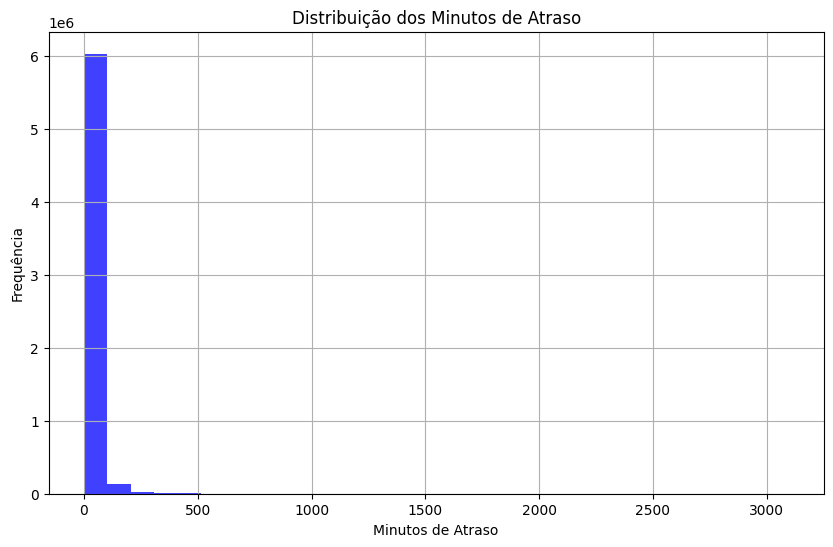

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df_voos_realizados['DepDelayMinutes'], bins=30, alpha=0.75, color='blue')
plt.title('Distribuição dos Minutos de Atraso')
plt.xlabel('Minutos de Atraso')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

Visualização entre **voos atrasados** e **total de voos**

<ipython-input-106-0a17ed67820d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_voos_realizados['FlightDate'] = pd.to_datetime(df_voos_realizados['FlightDate']);
<ipython-input-106-0a17ed67820d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_voos_realizados['IsDelayed'] = df_voos_realizados['DepDelayMinutes'] > 0;


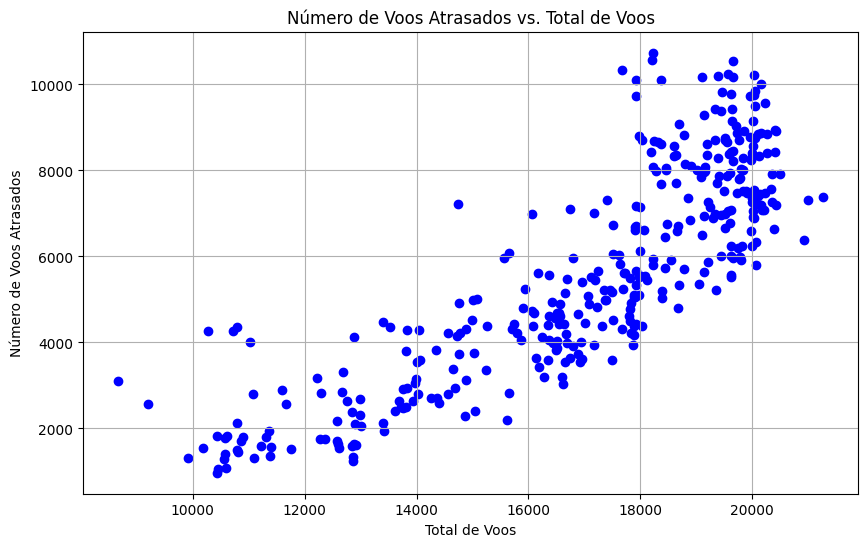

In [ ]:
df_voos_realizados['FlightDate'] = pd.to_datetime(df_voos_realizados['FlightDate']);
df_voos_realizados['IsDelayed'] = df_voos_realizados['DepDelayMinutes'] > 0;

# Agrupando e contando os voos por data
grouped = df_voos_realizados.groupby('FlightDate').agg(Total_Voos=('DepDelayMinutes', 'size'), Voos_Atrasados=('IsDelayed', 'sum')).reset_index()

plt.figure(figsize=(10, 6))
plt.scatter(grouped['Total_Voos'], grouped['Voos_Atrasados'], color='blue')
plt.title('Número de Voos Atrasados vs. Total de Voos')
plt.xlabel('Total de Voos')
plt.ylabel('Número de Voos Atrasados')
plt.grid(True)
plt.show()

In [ ]:
#Com essa visualização, já é possivel identificar uma correlação positiva entre o número de voos e a quantidade de atrasos.

# Filtrando apenas voos atrasados

Seguindo, vamos analisar a proporção de atrasos com a quantidade de voos por mês. No primeiro passo, separamos o total de voos na variável "voos_mes", em seguida, iremos filtrar o dataset com apenas os voos atrasados, entender seus dados, e tirar a proporção (%atrasos/mês)

In [ ]:
voos_mes = df_voos_realizados.groupby('Month').size()

# Imprimir o resultado
print(voos_mes)

Month
1     375229
2     329969
3     461222
4     471375
5     517709
6     564583
7     605508
8     592760
9     560140
10    582759
11    573134
12    566465
dtype: int64


In [ ]:
# Filtrando Dataset apenas voos atrasados

In [ ]:
df = df_voos_realizados[df_voos_realizados['DepDelayMinutes'] > 0]

In [ ]:
df.head(5)

,Airline,FlightDate,Month,DayofMonth,DayOfWeek,Origin,OriginCityName,Dest,DestCityName,DepDelayMinutes,IsDelayed
10,SkyWest Airlines Inc.,2021-03-03,3,3,3,PHX,"Phoenix, AZ",FAR,"Fargo, ND",2.0,True
12,SkyWest Airlines Inc.,2021-03-03,3,3,3,PHX,"Phoenix, AZ",ABQ,"Albuquerque, NM",8.0,True
36,SkyWest Airlines Inc.,2021-03-03,3,3,3,FSM,"Fort Smith, AR",DFW,"Dallas/Fort Worth, TX",22.0,True
37,SkyWest Airlines Inc.,2021-03-03,3,3,3,FLG,"Flagstaff, AZ",DFW,"Dallas/Fort Worth, TX",9.0,True
51,SkyWest Airlines Inc.,2021-03-03,3,3,3,DFW,"Dallas/Fort Worth, TX",FLG,"Flagstaff, AZ",148.0,True


In [ ]:
df.shape[0]

2054071

# Entendendo os dados de atraso

Medidas de valor central:

In [ ]:
media = df["DepDelayMinutes"].mean()
mediana = df["DepDelayMinutes"].median()
print(f"Média: {media}")
print(f"Mediana: {mediana}")

Média: 38.4594393280466
Mediana: 16.0


Medidas de dispersão

In [ ]:
dp = df["DepDelayMinutes"].std()
variancia = df["DepDelayMinutes"].var()
print(f"Desvio padrão: {dp}")
print(f"Variância: {variancia}")

Desvio padrão: 75.911325021428
Variância: 5762.529266508881


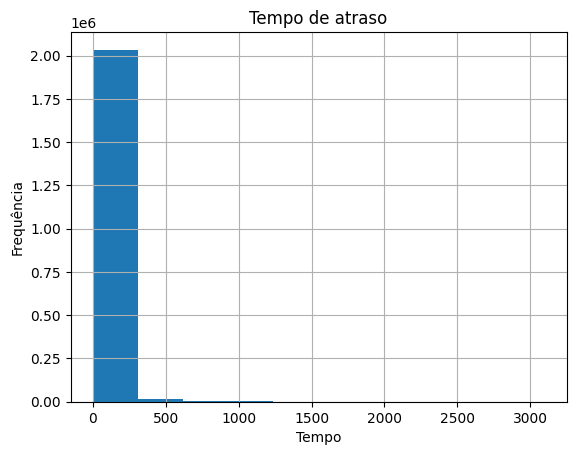

In [ ]:
df["DepDelayMinutes"].hist()

plt.title('Tempo de atraso')
plt.ylabel('Frequência')
plt.xlabel('Tempo')
plt.show()

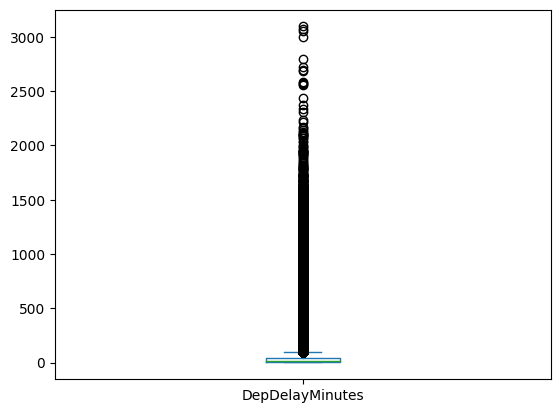

In [ ]:
df['DepDelayMinutes'].plot(kind="box")
plt.show()

Analisando o Histograma e o Boxplot, percebemos que o dataset dá a entender que voos remarcados são voos atrasados. Ex: voos com mais de 24h de atraso. Para nossa análise, decidimos considerar atrasos de até 8 horas (aproximadamente 500 minutos).

In [ ]:
# excluindo voos com mais de 500 minutos de atraso

In [ ]:
df = df[df['DepDelayMinutes'] <= 500]
df_voos_realizados = df_voos_realizados[df_voos_realizados['DepDelayMinutes'] <= 500]

In [ ]:
# verificando o tempo de atraso máximo (é esperado 500)

df["DepDelayMinutes"].max()

500.0

Novo Boxplot

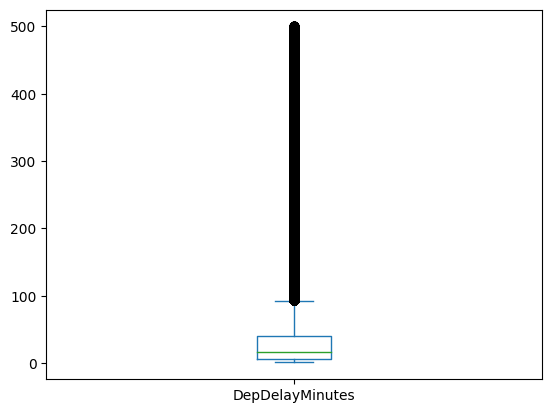

In [ ]:
df['DepDelayMinutes'].plot(kind="box")
plt.show()

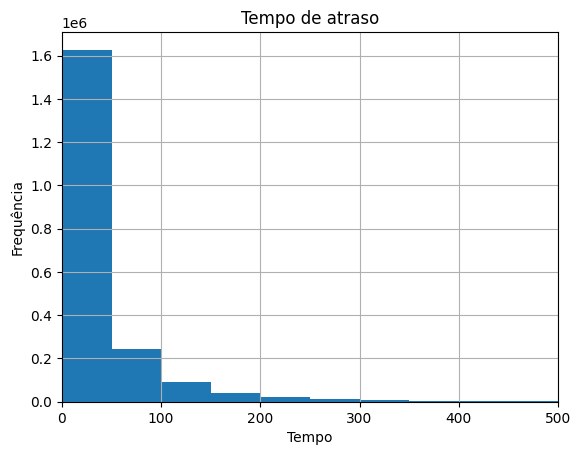

In [ ]:
df["DepDelayMinutes"].hist()
plt.xlim(0, 500)
plt.title('Tempo de atraso')
plt.ylabel('Frequência')
plt.xlabel('Tempo')
plt.show()

In [ ]:
# Analisando o dataset final de atraso após os filtros

In [ ]:
df.head(5)

,Airline,FlightDate,Month,DayofMonth,DayOfWeek,Origin,OriginCityName,Dest,DestCityName,DepDelayMinutes,IsDelayed
10,SkyWest Airlines Inc.,2021-03-03,3,3,3,PHX,"Phoenix, AZ",FAR,"Fargo, ND",2.0,True
12,SkyWest Airlines Inc.,2021-03-03,3,3,3,PHX,"Phoenix, AZ",ABQ,"Albuquerque, NM",8.0,True
36,SkyWest Airlines Inc.,2021-03-03,3,3,3,FSM,"Fort Smith, AR",DFW,"Dallas/Fort Worth, TX",22.0,True
37,SkyWest Airlines Inc.,2021-03-03,3,3,3,FLG,"Flagstaff, AZ",DFW,"Dallas/Fort Worth, TX",9.0,True
51,SkyWest Airlines Inc.,2021-03-03,3,3,3,DFW,"Dallas/Fort Worth, TX",FLG,"Flagstaff, AZ",148.0,True


In [ ]:
df.describe()

,FlightDate,Month,DayofMonth,DayOfWeek,DepDelayMinutes
count,2045134,2.045134e+06,2.045134e+06,2.045134e+06,2.045134e+06
mean,2021-08-01 15:14:13.012076032,7.526333e+00,1.599738e+01,4.092283e+00,3.501174e+01
min,2021-01-01 00:00:00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,2021-06-02 00:00:00,6.000000e+00,9.000000e+00,2.000000e+00,6.000000e+00
50%,2021-08-02 00:00:00,8.000000e+00,1.600000e+01,4.000000e+00,1.600000e+01
75%,2021-10-19 00:00:00,1.000000e+01,2.400000e+01,6.000000e+00,4.100000e+01
max,2021-12-31 00:00:00,1.200000e+01,3.100000e+01,7.000000e+00,5.000000e+02
std,NaN,3.041059e+00,8.753209e+00,2.025543e+00,5.232245e+01


Medidas de valor central e Dispersão

In [ ]:
media = df["DepDelayMinutes"].mean()
mediana = df["DepDelayMinutes"].median()
print(f"Média: {media}")
print(f"Mediana: {mediana}")

Média: 35.01173859512384
Mediana: 16.0


In [ ]:
dp = df["DepDelayMinutes"].std()
variancia = df["DepDelayMinutes"].var()

print(f"Desvio padrão: {dp}")
print(f"Variância: {variancia}")

Desvio padrão: 52.322452179307085
Variância: 2737.639002055877


In [ ]:
assimetria = df['DepDelayMinutes'].skew()
curtose = df['DepDelayMinutes'].kurtosis()

print('Assimetria:', assimetria)
print('Curtose:', curtose)

Assimetria: 3.316280521696013
Curtose: 14.853017111189047


In [ ]:
# Mediana continua igual, media, desvio padrão e variância menores. Mudanças esperadas após remover outliers

In [ ]:
# Assimetria e Curtose esperadas pela visualização do histograma.

# Correlação Atraso X Mês

Uma das grandes causas dos atrasos percebidos nos aeroportos, é causado pelo aumento do tráfego aéreo, principalmente nos meses de alta temporada e meses festivos. A partir disso, queremos analisar se esse ponto de vista procede. Então analisaremos a correlação entre porcentagem de atrasos (atraso/total voos) por Mês.

In [ ]:
df_voos_realizados = df_voos_realizados[df_voos_realizados['DepDelayMinutes'] <= 500]

df_voos_realizados['Atrasado'] = df_voos_realizados['DepDelayMinutes'] > 0

atrasos_mes = df_voos_realizados[df_voos_realizados['Atrasado']].groupby("Month").size()

proporcao_atraso = atrasos_mes / voos_mes

resultado = pd.DataFrame({
    'Total Voos': voos_mes,
    'Voos Atrasados': atrasos_mes,
    'Proporção Atrasos': proporcao_atraso
})

resultado.head(12)

,Total Voos,Voos Atrasados,Proporção Atrasos
Month,,,
1,375229,65349,0.174158
2,329969,77344,0.234398
3,461222,103029,0.223383
4,471375,110796,0.235049
5,517709,149481,0.288736
6,564583,236585,0.419044
7,605508,264797,0.437314
8,592760,237444,0.400574
9,560140,163762,0.292359


Analisando a matriz de correlação geral

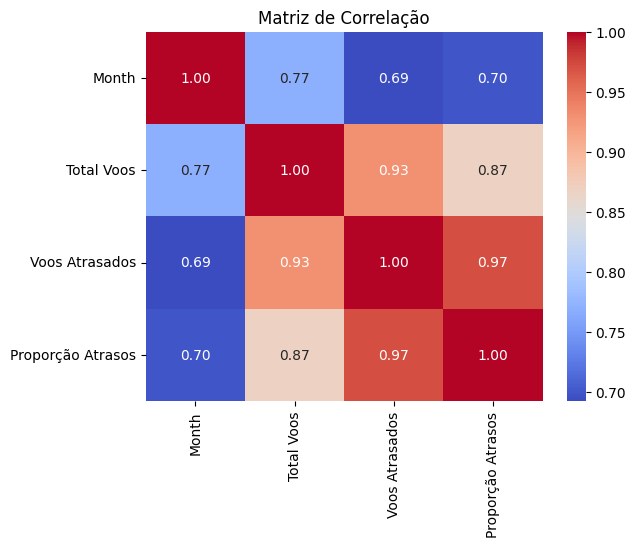

In [ ]:
# Calculando a matriz de correlação
resultado_novo = resultado.reset_index()

correlation_matrix = resultado_novo.corr(method='spearman')

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

Com essa visualização, conseguimos identificar diversas correlações, com destaque a "Total de voos" x "Voos atrasados", e "Proporção de atrasos" x "Total de voos".

Analisando e testando com mais detalhes a Proporção de Atraso por mês:

<ipython-input-132-a483f7fd429c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month', y='Proporção Atrasos', data=resultado_novo, palette='coolwarm')


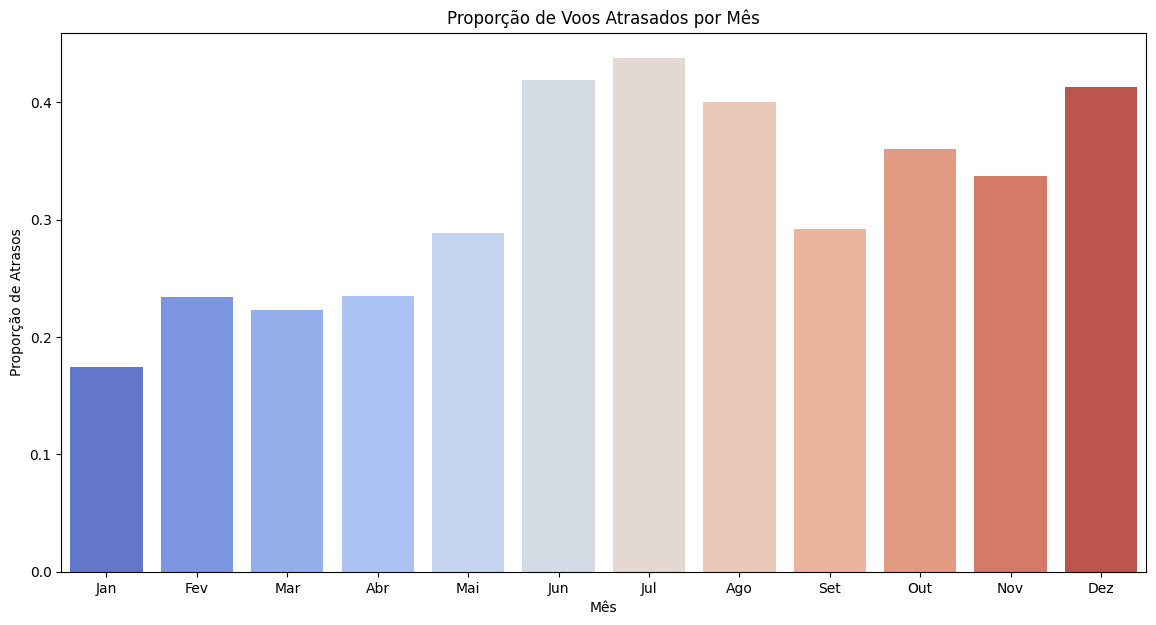

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 7))
sns.barplot(x='Month', y='Proporção Atrasos', data=resultado_novo, palette='coolwarm')
plt.title('Proporção de Voos Atrasados por Mês')
plt.xlabel('Mês')
plt.ylabel('Proporção de Atrasos')
plt.xticks(range(12), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])  # Adicionar nomes de meses para clareza
plt.show()


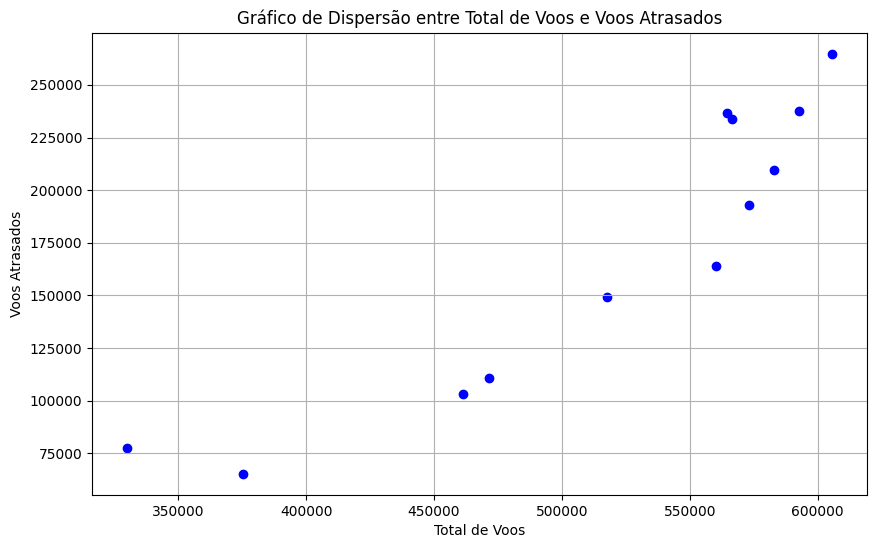

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(resultado['Total Voos'], resultado['Voos Atrasados'], color='blue')
plt.title('Gráfico de Dispersão entre Total de Voos e Voos Atrasados')
plt.xlabel('Total de Voos')
plt.ylabel('Voos Atrasados')
plt.grid(True)
plt.show()

In [ ]:
# Matriz de correlação Total Voos x Proporção de atraso:

In [ ]:
df_correlacao = resultado_novo[["Total Voos", "Proporção Atrasos"]]
df_correlacao.corr(method='spearman')

,Total Voos,Proporção Atrasos
Total Voos,1.000000,0.867133
Proporção Atrasos,0.867133,1.000000


In [ ]:
# Resultado da correlação de Spearman = 0.867133

Sendo assim, temos certeza de que a alta quantidade de voos implica em mais atrasos. Considerando que meses de alta temporada possuem mais voos, consequentemente possuem mais atrasos, mesmo que proporcionalmente, em virtude do aumento da demanda.

# Teste de Hipótese

Para o teste de hipótese, queremos confirmar Formalmente a Correlação entre Voos atrasados e Meses de alta temporada.

Utilizaremos o teste de correlação de Spearman. Este é um teste não paramétrico que mede a força e a direção da associação entre duas variáveis ranqueadas.

Este teste avalia se as diferenças observadas nas medianas dos grupos são grandes o suficiente para serem consideradas estatisticamente significativas, ou se elas poderiam ter ocorrido ao acaso.

Assim, veremos se as variações nas proporções de atrasos ao longo dos meses são consistentes ou se algumas flutuações específicas indicam mudanças significativas.

**Hipótese Nula (H0)**: Não existe correlação entre o total de voos e a proporção de voos atrasados.

**Hipótese Alternativa (H1)**: Existe uma correlação entre o total de voos e a proporção de voos atrasados.


Se o p-valor > 0.05: Aceitamos a hipótese nula (H0), indicando que não há evidência estatística suficiente para afirmar que existe uma correlação entre o total de voos e a proporção de voos atrasados.

Se o p-valor < 0.05: Rejeitamos a hipótese nula (H0) e aceitamos a hipótese alternativa (H1), sugerindo que existe uma correlação estatística significativa entre o total de voos e a proporção de voos atrasados.


In [ ]:
from scipy.stats import spearmanr

# Spearman's correlation test
correlation, p_value = spearmanr(resultado_novo['Total Voos'], resultado_novo['Proporção Atrasos'])

print(f"Spearman Correlation Coefficient: {correlation}")
print(f"P-value: {p_value}")

Spearman Correlation Coefficient: 0.8671328671328673
P-value: 0.00025981184986148103


In [ ]:
# Hipotese nula rejeitada, Hipotese alternativa Aceita

# Discretização

In [ ]:
# Definindo os intervalos de atraso
bins = [-1, 0, 30, 60, float('inf')]
labels = ['Sem Atraso', 'Atraso Leve', 'Atraso Moderado', 'Atraso Grave']

df_voos_realizados['CategoriaAtraso'] = pd.cut(df_voos_realizados['DepDelayMinutes'], bins=bins, labels=labels)

df_voos_realizados.head(5)

<ipython-input-19-ce80ee31db02>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_voos_realizados['CategoriaAtraso'] = pd.cut(df_voos_realizados['DepDelayMinutes'], bins=bins, labels=labels)


,Airline,FlightDate,Month,DayofMonth,DayOfWeek,Origin,OriginCityName,Dest,DestCityName,DepDelayMinutes,CategoriaAtraso
0,SkyWest Airlines Inc.,2021-03-03,3,3,3,SGU,"St. George, UT",PHX,"Phoenix, AZ",0.0,Sem Atraso
1,SkyWest Airlines Inc.,2021-03-03,3,3,3,PHX,"Phoenix, AZ",SGU,"St. George, UT",0.0,Sem Atraso
2,SkyWest Airlines Inc.,2021-03-03,3,3,3,MHT,"Manchester, NH",ORD,"Chicago, IL",0.0,Sem Atraso
3,SkyWest Airlines Inc.,2021-03-03,3,3,3,DFW,"Dallas/Fort Worth, TX",TRI,"Bristol/Johnson City/Kingsport, TN",0.0,Sem Atraso
4,SkyWest Airlines Inc.,2021-03-03,3,3,3,PHX,"Phoenix, AZ",BFL,"Bakersfield, CA",0.0,Sem Atraso


# Inputação de dados ausentes

Como nosso dataset não possui dados "sujos" ou ausentes, resolvemos extrair uma amostra dos dados, apagar aleatoriamente 15% dos valores de "DepDelayMinutes", e inputa-los utilizando o KNN. A razão por utilizar uma amostra dos dados se resume à capacidade computacional, visto que nosso dataset de atrasos possui aproximadamente 6.000.000 milhões de linhas, assim, inputar 15% disso seria custoso para o limite de memória disponível no Colab.



Deste modo, com a discretização feita, nossa seleção de dados se baseará na "categoria de atraso" para garantir que a distribuição dos atrasos seja representativa na amostra.

In [ ]:
# Normalizar colunas para utilizar o KNN

Mesmo tratando-se de variáveis categóricas, há um relação previamente explorada entre essas colunas. Então optamos por normalizar os dados dessa coluna para a inputação com knn

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_voos_realizados[['Month']] = scaler.fit_transform(df_voos_realizados[['Month']])
df_voos_realizados[['DayOfWeek']] = scaler.fit_transform(df_voos_realizados[['DayOfWeek']])
df_voos_realizados[['DayofMonth']] = scaler.fit_transform(df_voos_realizados[['DayOfWeek']])
df_voos_realizados[['DepDelayMinutes']] = scaler.fit_transform(df_voos_realizados[['DepDelayMinutes']])

In [ ]:
df_voos_realizados.head(5)

,Airline,FlightDate,Month,DayofMonth,DayOfWeek,Origin,OriginCityName,Dest,DestCityName,DepDelayMinutes,IsDelayed,Atrasado,CategoriaAtraso
0,SkyWest Airlines Inc.,2021-03-03,0.181818,0.333333,0.333333,SGU,"St. George, UT",PHX,"Phoenix, AZ",0.0,False,False,Sem Atraso
1,SkyWest Airlines Inc.,2021-03-03,0.181818,0.333333,0.333333,PHX,"Phoenix, AZ",SGU,"St. George, UT",0.0,False,False,Sem Atraso
2,SkyWest Airlines Inc.,2021-03-03,0.181818,0.333333,0.333333,MHT,"Manchester, NH",ORD,"Chicago, IL",0.0,False,False,Sem Atraso
3,SkyWest Airlines Inc.,2021-03-03,0.181818,0.333333,0.333333,DFW,"Dallas/Fort Worth, TX",TRI,"Bristol/Johnson City/Kingsport, TN",0.0,False,False,Sem Atraso
4,SkyWest Airlines Inc.,2021-03-03,0.181818,0.333333,0.333333,PHX,"Phoenix, AZ",BFL,"Bakersfield, CA",0.0,False,False,Sem Atraso


In [ ]:
# Separando amostra estratificada com base na categoria de atraso

In [ ]:
grouped = df_voos_realizados.groupby('CategoriaAtraso', group_keys=False)
sampled_df = grouped.apply(lambda x: x.sample(min(len(x), int(1000 * (len(x) / len(df_voos_realizados)))), random_state=42))

In [ ]:
sampled_df.head(5)

,Airline,FlightDate,Month,DayofMonth,DayOfWeek,Origin,OriginCityName,Dest,DestCityName,DepDelayMinutes,IsDelayed,Atrasado,CategoriaAtraso
2087019,United Air Lines Inc.,2021-11-14,0.909091,1.000000,1.000000,IAH,"Houston, TX",RSW,"Fort Myers, FL",0.0,False,False,Sem Atraso
6150102,JetBlue Airways,2021-06-03,0.454545,0.500000,0.500000,BOS,"Boston, MA",LGA,"New York, NY",0.0,False,False,Sem Atraso
5949981,Frontier Airlines Inc.,2021-06-15,0.454545,0.166667,0.166667,PDX,"Portland, OR",DEN,"Denver, CO",0.0,False,False,Sem Atraso
588810,Republic Airlines,2021-12-10,1.000000,0.666667,0.666667,DCA,"Washington, DC",MSY,"New Orleans, LA",0.0,False,False,Sem Atraso
3256486,SkyWest Airlines Inc.,2021-08-27,0.636364,0.666667,0.666667,SJT,"San Angelo, TX",IAH,"Houston, TX",0.0,False,False,Sem Atraso


In [ ]:
sampled_df.describe()

,FlightDate,Month,DayofMonth,DayOfWeek,DepDelayMinutes
count,998,998.000000,998.000000,998.000000,998.000000
mean,2021-07-14 07:09:58.797595136,0.539625,0.514028,0.514028,0.023565
min,2021-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000
25%,2021-04-19 06:00:00,0.272727,0.166667,0.166667,0.000000
50%,2021-07-20 00:00:00,0.545455,0.500000,0.500000,0.000000
75%,2021-10-12 00:00:00,0.818182,0.833333,0.833333,0.012000
max,2021-12-31 00:00:00,1.000000,1.000000,1.000000,0.710000
std,NaN,0.303524,0.333205,0.333205,0.070669


In [ ]:
# Removendo 15% dos dados "DepDelayMinutes" de forma aleatória

In [ ]:
num_rows = sampled_df.shape[0]
num_to_remove = int(num_rows * 0.15)

np.random.seed(42)
indices_to_remove = np.random.choice(sampled_df.index, num_to_remove, replace=False)

# Definindo 15% dos valores de 'DepDelayMinutes' como NaN
sampled_df.loc[indices_to_remove, 'DepDelayMinutes'] = np.nan

In [ ]:
# Verificando dados nulos em DepDelayMinutes

In [ ]:
sampled_df.isnull().sum()

Airline              0
FlightDate           0
Month                0
DayofMonth           0
DayOfWeek            0
Origin               0
OriginCityName       0
Dest                 0
DestCityName         0
DepDelayMinutes    149
IsDelayed            0
Atrasado             0
CategoriaAtraso      0
dtype: int64

In [ ]:
# Inputando dados com o KNN

Utilizaremos as colunas que possuem relação com os atrasos. São elas: Month, DayofMonth e DayOfWeek.

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)

# só colunas numéricas
columns = sampled_df.select_dtypes(include=[np.number]).columns
sampled_df[columns] = imputer.fit_transform(sampled_df[columns])


In [ ]:
# Verificando se os valores foram adicionados

In [ ]:
sampled_df.isnull().sum()

Airline            0
FlightDate         0
Month              0
DayofMonth         0
DayOfWeek          0
Origin             0
OriginCityName     0
Dest               0
DestCityName       0
DepDelayMinutes    0
IsDelayed          0
Atrasado           0
CategoriaAtraso    0
dtype: int64

In [ ]:
# Comparando com as medidas antigas

In [ ]:
# Medidas antes da inputação:

# Média: 0.023565
# Mediana: 0.0
# Desvio padrão: 0.070669

media = sampled_df["DepDelayMinutes"].mean()
mediana = sampled_df["DepDelayMinutes"].median()
dp = sampled_df["DepDelayMinutes"].std()

print(f"Média: {media}")
print(f"Mediana: {mediana}")
print(f"Desvio padrão: {dp}")

Média: 0.022034869739478963
Mediana: 0.0
Desvio padrão: 0.06351747819807549


Mediana continuou igual, média praticamente não mudou, e desvio padrão variou em aproximadamente 0.006

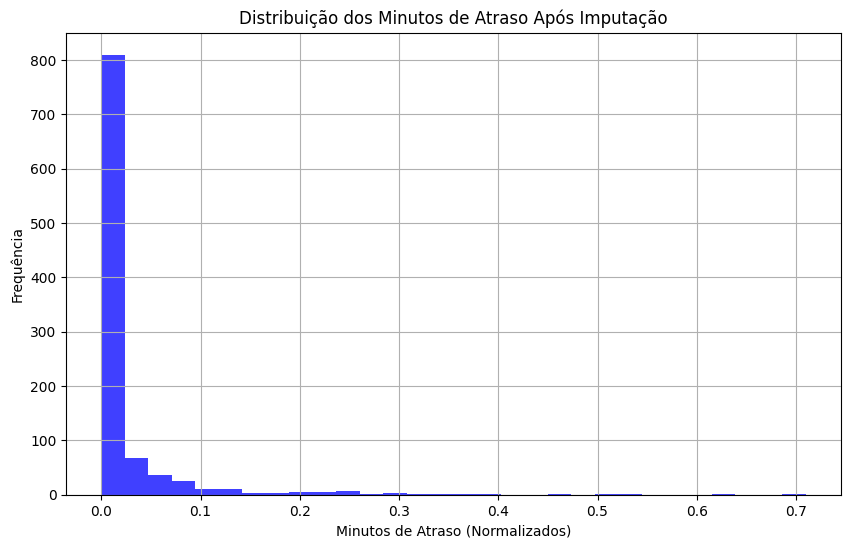

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(sampled_df['DepDelayMinutes'], bins=30, alpha=0.75, color='blue')
plt.title('Distribuição dos Minutos de Atraso Após Imputação')
plt.xlabel('Minutos de Atraso (Normalizados)')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

In [ ]:
# Com o histograma da amostra inputada com KNN, conseguimos analisar uma incrível semelhança com a distribuição dos dados pré-inputação

# Projeto 2

In [ ]:
# Início do projeto 2

# Filtragem de rotas

Na segunda parte do projeto, iremos
utilizar Regressão para predição do tempo de atraso dos voos. Para isso, analisaremos as rotas mais comuns de voos.

In [ ]:
voos_por_origem_dest = df_voos_realizados.groupby(['Origin', 'Dest']).size().reset_index(name='Count')

voos_por_origem_dest = voos_por_origem_dest.sort_values(by='Count', ascending=False)

In [ ]:
voos_por_origem_dest.head(5)

,Origin,Dest,Count
3609,LAX,SFO,9519
6256,SFO,LAX,9503
3561,LAX,LAS,8649
3439,LAS,LAX,8629
2728,HNL,OGG,8181


Assim, selecionamos as rotas
Los angeles(LAX) --> São francisco(SFO)
Orlando(MCO) --> Atlanta(ATL)
Denver(DEN) --> Phoenix(PHX)
Atlanta(ATL) --> Florida (FFL)
Seatle(SEA) --> Portland(PDX)
Salt lake city(SLC) --> Denver(DEN)
New York(JFK) --> Los angeles(LAX)

In [ ]:
df_selected_routes = df_voos_realizados[
    ((df_voos_realizados['Origin'] == 'LAX') & (df_voos_realizados['Dest'] == 'SFO')) |
    ((df_voos_realizados['Origin'] == 'MCO') & (df_voos_realizados['Dest'] == 'ATL')) |
    ((df_voos_realizados['Origin'] == 'ATL') & (df_voos_realizados['Dest'] == 'FLL')) |
    ((df_voos_realizados['Origin'] == 'DEN') & (df_voos_realizados['Dest'] == 'PHX')) |
    ((df_voos_realizados['Origin'] == 'JFK') & (df_voos_realizados['Dest'] == 'LAX'))
]

In [ ]:
from sklearn.preprocessing import StandardScaler

df_selected_routes = df_selected_routes[df_selected_routes["DepDelayMinutes"] <= 30]

df_voos_realizados = df_voos_realizados[df_voos_realizados["DepDelayMinutes"] <= 30]
bins = [-1, 0, 30]
labels = ['Sem Atraso', 'Atraso Leve']

df_selected_routes['CategoriaAtraso'] = pd.cut(df_selected_routes['DepDelayMinutes'], bins=bins, labels=labels)
df_voos_realizados['CategoriaAtraso'] = pd.cut(df_selected_routes['DepDelayMinutes'], bins=bins, labels=labels)


In [ ]:
df_selected_routes.head(5)

,Airline,FlightDate,Month,DayofMonth,DayOfWeek,Origin,OriginCityName,Dest,DestCityName,DepDelayMinutes,CategoriaAtraso
16,SkyWest Airlines Inc.,2021-03-03,3,3,3,LAX,"Los Angeles, CA",SFO,"San Francisco, CA",0.0,Sem Atraso
32,SkyWest Airlines Inc.,2021-03-03,3,3,3,LAX,"Los Angeles, CA",SFO,"San Francisco, CA",0.0,Sem Atraso
295,SkyWest Airlines Inc.,2021-03-02,3,2,2,LAX,"Los Angeles, CA",SFO,"San Francisco, CA",0.0,Sem Atraso
311,SkyWest Airlines Inc.,2021-03-02,3,2,2,LAX,"Los Angeles, CA",SFO,"San Francisco, CA",0.0,Sem Atraso
539,SkyWest Airlines Inc.,2021-03-18,3,18,4,LAX,"Los Angeles, CA",SFO,"San Francisco, CA",0.0,Sem Atraso


# Treinamento de modelos o com MLflow (Separação de dados)

Para a predição do tempo de atraso, decidimos utilizar Regressão Linear, Random Forest, Árvore de Decisão para Regressão e Gradient Boosting.

In [ ]:
!pip install mlflow

In [ ]:
import mlflow
import mlflow.sklearn
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, auc
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

mlflow.set_experiment("Flight status prediction")

<Experiment: artifact_location='file:///content/mlruns/930067557519370357', creation_time=1720744480198, experiment_id='930067557519370357', last_update_time=1720744480198, lifecycle_stage='active', name='Flight status prediction', tags={}>

# Treinamento geral dos modelos com MLFlow e seleção de Hiper-parâmetros

/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


Best Logistic Regression model: LogisticRegression(C=0.1, max_iter=1000)
Validation AUC-ROC for Logistic Regression: 0.661524772050396


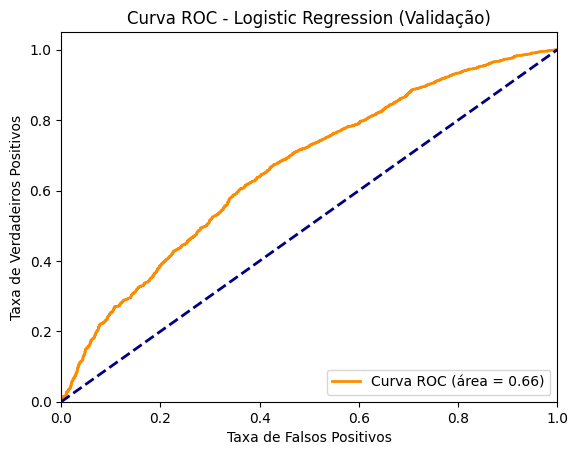

Best Random Forest model: RandomForestClassifier(max_depth=10, n_estimators=200)
Validation AUC-ROC for Random Forest: 0.6908978303943866


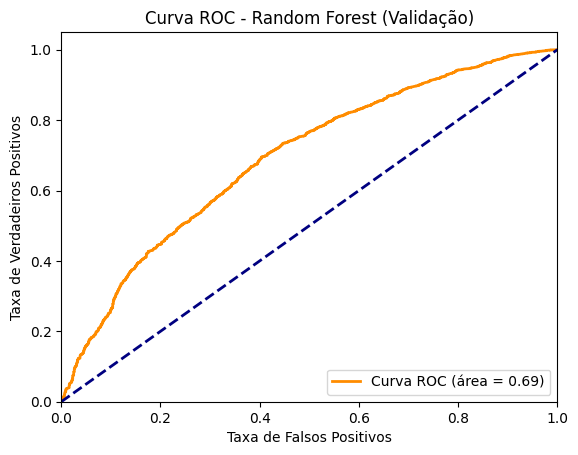

Best Gradient Boosting model: GradientBoostingClassifier(n_estimators=200)
Validation AUC-ROC for Gradient Boosting: 0.6971426866063514


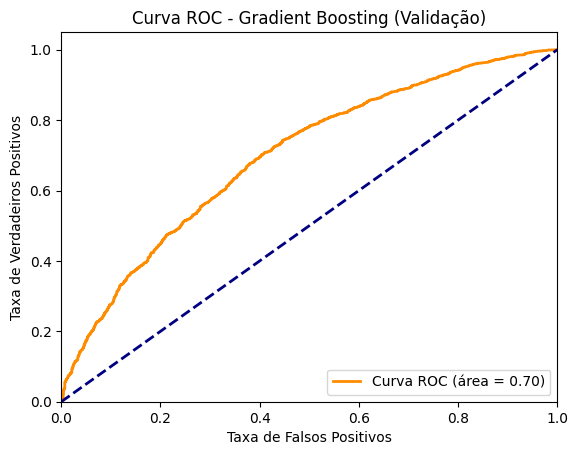

Best XGBoost model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)
Validation AUC-ROC for XGBoost: 0.69901212220883


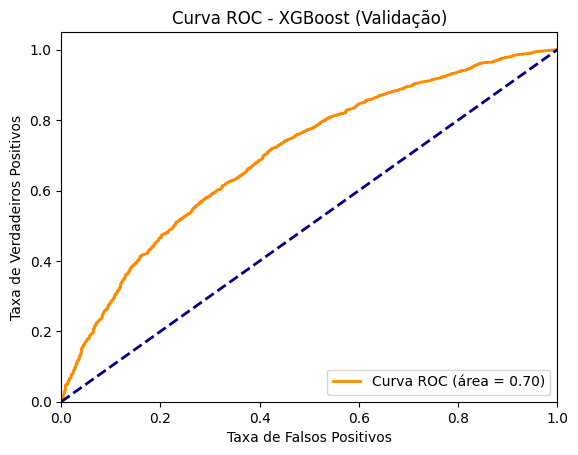

Best Model: XGBoost
Test AUC-ROC: 0.6974276960183613


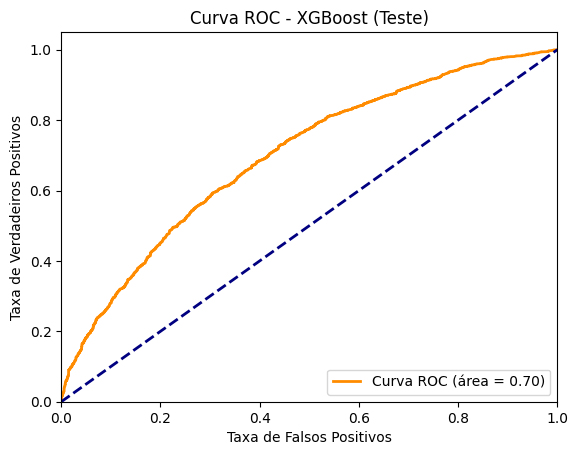

In [ ]:
# Normalizar colunas específicas com z-score
cols_to_normalize = ['Month', 'DayofMonth', 'DayOfWeek']
scaler = StandardScaler()
df_selected_routes[cols_to_normalize] = scaler.fit_transform(df_selected_routes[cols_to_normalize])

# Codificar colunas categóricas
df_selected_routes = pd.get_dummies(df_selected_routes, columns=['Airline', 'Origin', 'Dest'], drop_first=True)

# Selecionar features e variável alvo
X = df_selected_routes.drop(columns=['CategoriaAtraso', 'FlightDate', 'OriginCityName', 'DestCityName', 'DepDelayMinutes'])
y = df_selected_routes['CategoriaAtraso']

# Codificar as classes de 'y' como valores numéricos
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Dividir os dados em conjuntos de treinamento, validação e teste com estratificação
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)


# Definir hiperparâmetros para GridSearchCV
param_grid_lr = {
    'C': [0.1, 1, 10]
}

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20]
}

param_grid_gb = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200]
}

param_grid_xgb = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7]
}

# Lista de modelos e seus parâmetros para GridSearchCV
models = {
    'Logistic Regression': (LogisticRegression(max_iter=1000), param_grid_lr),
    'Random Forest': (RandomForestClassifier(), param_grid_rf),
    'Gradient Boosting': (GradientBoostingClassifier(), param_grid_gb),
    'XGBoost': (XGBClassifier(use_label_encoder=False, eval_metric='logloss'), param_grid_xgb)
}

best_models = {}

# Função para treinar e logar o modelo com MLflow
def train_and_log_model(model, model_name, param_grid):
    with mlflow.start_run(run_name=model_name):
        skf = StratifiedKFold(n_splits=3)
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=skf, scoring='roc_auc', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_

        # Avaliação no conjunto de validação
        y_val_pred_proba = best_model.predict_proba(X_val)[:, 1]
        val_auc_roc = roc_auc_score(y_val, y_val_pred_proba)
        fpr, tpr, _ = roc_curve(y_val, y_val_pred_proba)
        roc_auc = auc(fpr, tpr)

        # Logar métricas e modelo
        mlflow.log_param("best_params", grid_search.best_params_)
        mlflow.log_metric("validation_auc_roc", val_auc_roc)
        mlflow.sklearn.log_model(best_model, model_name)

        print(f"Best {model_name} model: {best_model}")
        print(f"Validation AUC-ROC for {model_name}: {val_auc_roc}")

        # Plotar a curva ROC para validação
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('Taxa de Falsos Positivos')
        plt.ylabel('Taxa de Verdadeiros Positivos')
        plt.title(f'Curva ROC - {model_name} (Validação)')
        plt.legend(loc="lower right")
        plt.show()

        return best_model

# Treinar e logar cada modelo
for model_name, (model, param_grid) in models.items():
    best_models[model_name] = train_and_log_model(model, model_name, param_grid)

# Selecionar o melhor modelo com base na AUC-ROC de validação
best_model_name = max(best_models, key=lambda name: roc_auc_score(y_val, best_models[name].predict_proba(X_val)[:, 1]))
best_model = best_models[best_model_name]

# Avaliar o melhor modelo no conjunto de teste
y_test_pred_proba = best_model.predict_proba(X_test)[:, 1]
test_auc_roc = roc_auc_score(y_test, y_test_pred_proba)
fpr, tpr, _ = roc_curve(y_test, y_test_pred_proba)
roc_auc = auc(fpr, tpr)

# Logar o melhor modelo no MLflow com avaliação no conjunto de teste
with mlflow.start_run(run_name=f"Best Model - {best_model_name}"):
    mlflow.sklearn.log_model(best_model, best_model_name)
    mlflow.log_metric("test_auc_roc", test_auc_roc)

    print(f"Best Model: {best_model_name}")
    print(f"Test AUC-ROC: {test_auc_roc}")

    # Plotar a curva ROC para o conjunto de teste
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taxa de Falsos Positivos')
    plt.ylabel('Taxa de Verdadeiros Positivos')
    plt.title(f'Curva ROC - {best_model_name} (Teste)')
    plt.legend(loc="lower right")
    plt.show()

Assim, temos como melhor modelo no conjunto de validação e pontuação geral na métrica AOC-ROC. Assim temos como melhor modelo o XGBoost

In [ ]:
!pip install pyngrok

In [ ]:
from pyngrok import ngrok

!ngrok config add-authtoken 2j7niFc0qFcEplOfJyJKPHCdACh_3JskhgkJ7NEviWkpf58m

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
public_url = ngrok.connect(5000)
print("MLflow UI disponível em:", public_url)

# Iniciar o MLflow UI
get_ipython().system_raw("mlflow ui --port 5000 &")

MLflow UI disponível em: NgrokTunnel: "https://6638-35-245-32-226.ngrok-free.app" -> "http://localhost:5000"


Avaliando o xgboost em todos os conjuntos

Train AUC-ROC for XGBoost: 0.7457286222877687
Validation AUC-ROC for XGBoost: 0.69901212220883
Test AUC-ROC for XGBoost: 0.6974276960183613


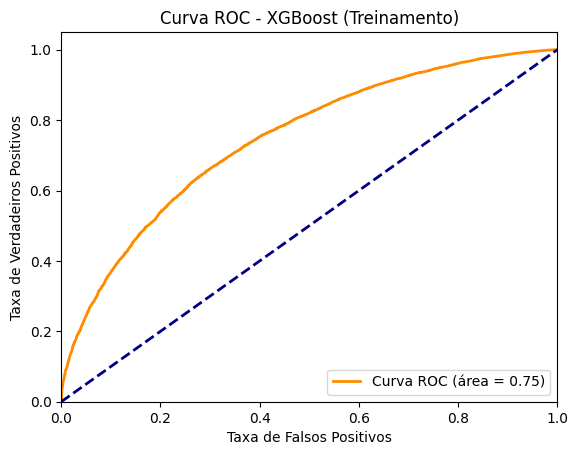

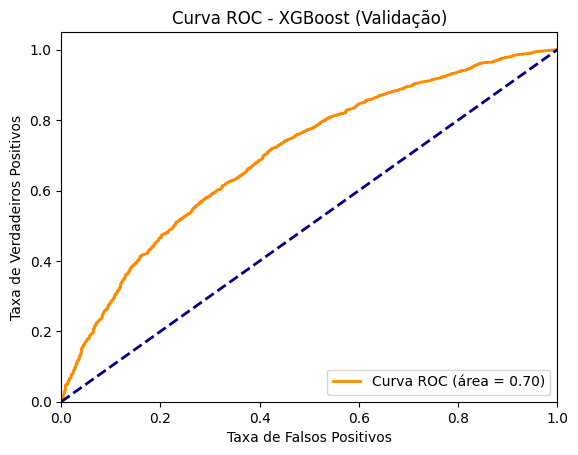

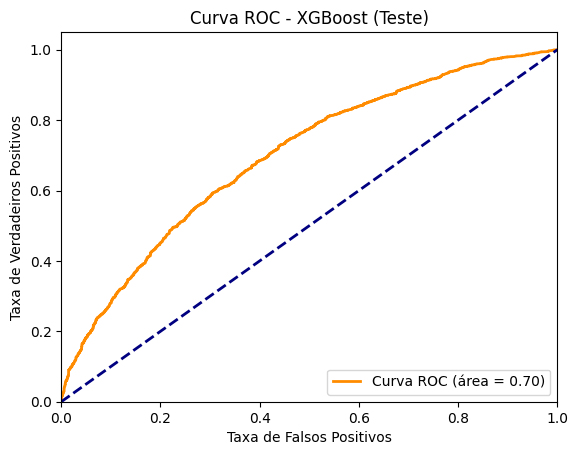

In [ ]:
# Treinar o modelo XGBoost
best_xgb_model = XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss')
best_xgb_model.fit(X_train, y_train)

# Avaliar o modelo no conjunto de treinamento
y_train_pred_proba = best_xgb_model.predict_proba(X_train)[:, 1]
train_auc_roc = roc_auc_score(y_train, y_train_pred_proba)
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_proba)
roc_auc_train = auc(fpr_train, tpr_train)
print(f"Train AUC-ROC for XGBoost: {train_auc_roc}")

# Avaliar o modelo no conjunto de validação
y_val_pred_proba = best_xgb_model.predict_proba(X_val)[:, 1]
val_auc_roc = roc_auc_score(y_val, y_val_pred_proba)
fpr_val, tpr_val, _ = roc_curve(y_val, y_val_pred_proba)
roc_auc_val = auc(fpr_val, tpr_val)
print(f"Validation AUC-ROC for XGBoost: {val_auc_roc}")

# Avaliar o modelo no conjunto de teste
y_test_pred_proba = best_xgb_model.predict_proba(X_test)[:, 1]
test_auc_roc = roc_auc_score(y_test, y_test_pred_proba)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_proba)
roc_auc_test = auc(fpr_test, tpr_test)
print(f"Test AUC-ROC for XGBoost: {test_auc_roc}")

# Plotar a curva ROC para o conjunto de treinamento
plt.figure()
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc_train)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC - XGBoost (Treinamento)')
plt.legend(loc="lower right")
plt.show()

# Plotar a curva ROC para o conjunto de validação
plt.figure()
plt.plot(fpr_val, tpr_val, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc_val)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC - XGBoost (Validação)')
plt.legend(loc="lower right")
plt.show()

# Plotar a curva ROC para o conjunto de teste
plt.figure()
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC - XGBoost (Teste)')
plt.legend(loc="lower right")
plt.show()

A partir da análise de desempenho geral do modelo, podemos identificar que o modelo apresenta uma boa performance no conjunto de treinamento, indicando que ele consegue capturar bem os padrões.
No entanto, a performance cai tanto no conjunto de validação quanto no de teste.

Assim, concluimos que o modelo está com Overfitting

Para mitiga-lo, iremos testar algumas alterações:

Adicionar mais dados ao conjunto de treinamento para ajudar o modelo a generalizar melhor.

Utilizar uma cross-validation mais robusta para garantir que a validação seja representativa do desempenho do modelo.

Testar técnicas de ensemble simples, como bagging ou boosting

# Ajuste do modelo

Começaremos com a adição de dados

In [ ]:
df_selected_routes_maior = df_voos_realizados[
    ((df_voos_realizados['Origin'] == 'LAX') & (df_voos_realizados['Dest'] == 'SFO')) |
    ((df_voos_realizados['Origin'] == 'MCO') & (df_voos_realizados['Dest'] == 'ATL')) |
    ((df_voos_realizados['Origin'] == 'DEN') & (df_voos_realizados['Dest'] == 'PHX')) |
    ((df_voos_realizados['Origin'] == 'ATL') & (df_voos_realizados['Dest'] == 'FLL')) |
    ((df_voos_realizados['Origin'] == 'SEA') & (df_voos_realizados['Dest'] == 'PDX')) |
    ((df_voos_realizados['Origin'] == 'JFK') & (df_voos_realizados['Dest'] == 'LAX')) |
    ((df_voos_realizados['Origin'] == 'SLC') & (df_voos_realizados['Dest'] == 'DEN'))
]

In [ ]:
from sklearn.preprocessing import StandardScaler

df_selected_routes_maior = df_selected_routes_maior[df_selected_routes_maior["DepDelayMinutes"] <= 30]

df_voos_realizados = df_voos_realizados[df_voos_realizados["DepDelayMinutes"] <= 30]
bins = [-1, 0, 30]
labels = ['Sem Atraso', 'Atraso Leve']

df_selected_routes_maior['CategoriaAtraso'] = pd.cut(df_selected_routes_maior['DepDelayMinutes'], bins=bins, labels=labels)
df_voos_realizados['CategoriaAtraso'] = pd.cut(df_selected_routes_maior['DepDelayMinutes'], bins=bins, labels=labels)

In [ ]:
# Normalizar colunas específicas com z-score
cols_to_normalize = ['Month', 'DayofMonth', 'DayOfWeek']
scaler = StandardScaler()
df_selected_routes_maior[cols_to_normalize] = scaler.fit_transform(df_selected_routes_maior[cols_to_normalize])

# Codificar colunas categóricas
df_selected_routes_maior = pd.get_dummies(df_selected_routes_maior, columns=['Airline', 'Origin', 'Dest'], drop_first=True)

# Selecionar features e variável alvo
X = df_selected_routes_maior.drop(columns=['CategoriaAtraso', 'FlightDate', 'OriginCityName', 'DestCityName', 'DepDelayMinutes'])
y = df_selected_routes_maior['CategoriaAtraso']

# Codificar as classes de 'y' como valores numéricos
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Dividir os dados em conjuntos de treinamento, validação e teste com estratificação
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

Train AUC-ROC for XGBoost: 0.7316043859916052
Validation AUC-ROC for XGBoost: 0.7054540057546477
Test AUC-ROC for XGBoost: 0.6978302919119803


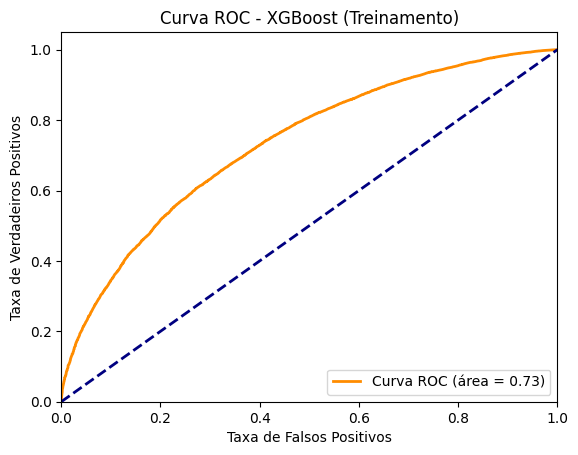

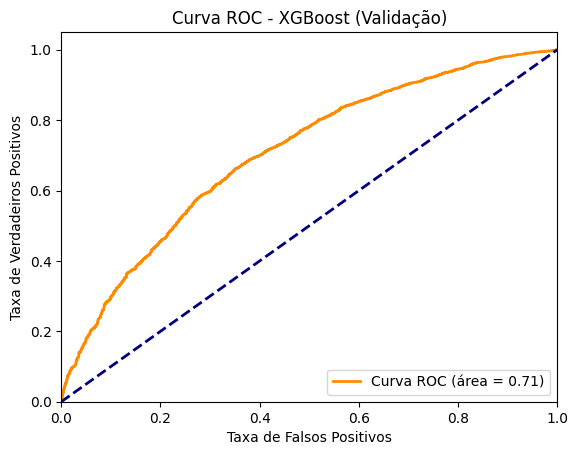

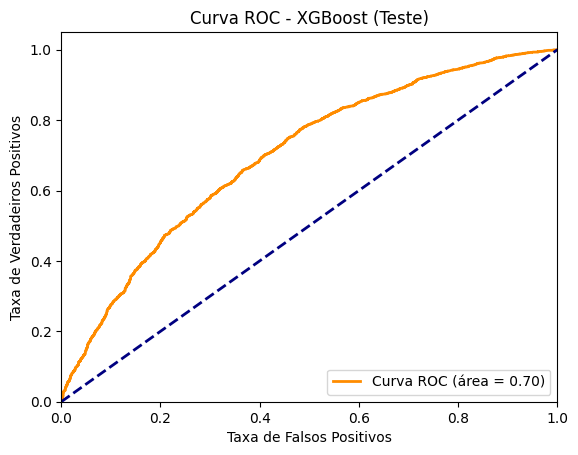

In [ ]:
# Treinar o modelo XGBoost
best_xgb_model = XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss')
best_xgb_model.fit(X_train, y_train)

# Avaliar o modelo no conjunto de treinamento
y_train_pred_proba = best_xgb_model.predict_proba(X_train)[:, 1]
train_auc_roc = roc_auc_score(y_train, y_train_pred_proba)
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_proba)
roc_auc_train = auc(fpr_train, tpr_train)
print(f"Train AUC-ROC for XGBoost: {train_auc_roc}")

# Avaliar o modelo no conjunto de validação
y_val_pred_proba = best_xgb_model.predict_proba(X_val)[:, 1]
val_auc_roc = roc_auc_score(y_val, y_val_pred_proba)
fpr_val, tpr_val, _ = roc_curve(y_val, y_val_pred_proba)
roc_auc_val = auc(fpr_val, tpr_val)
print(f"Validation AUC-ROC for XGBoost: {val_auc_roc}")

# Avaliar o modelo no conjunto de teste
y_test_pred_proba = best_xgb_model.predict_proba(X_test)[:, 1]
test_auc_roc = roc_auc_score(y_test, y_test_pred_proba)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_proba)
roc_auc_test = auc(fpr_test, tpr_test)
print(f"Test AUC-ROC for XGBoost: {test_auc_roc}")

# Plotar a curva ROC para o conjunto de treinamento
plt.figure()
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc_train)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC - XGBoost (Treinamento)')
plt.legend(loc="lower right")
plt.show()

# Plotar a curva ROC para o conjunto de validação
plt.figure()
plt.plot(fpr_val, tpr_val, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc_val)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC - XGBoost (Validação)')
plt.legend(loc="lower right")
plt.show()

# Plotar a curva ROC para o conjunto de teste
plt.figure()
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC - XGBoost (Teste)')
plt.legend(loc="lower right")
plt.show()

Analisando os resultados, o AOC-ROC de treinamento caiu em 0.01, enquanto os valores de validação e treinamento subiram, ambos passando de 0.70. Isso indica uma melhora no modelo com a adição de dados.

Agora, iremos tentar uma técnica de gridsearch com cross validation e k-fold para aprimorar o modelo

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best XGBoost model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=5, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)


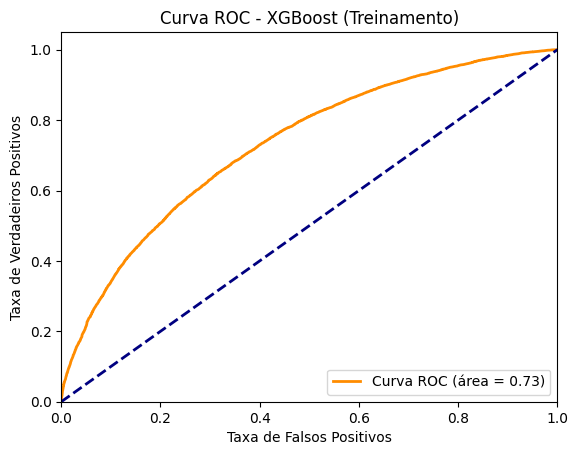

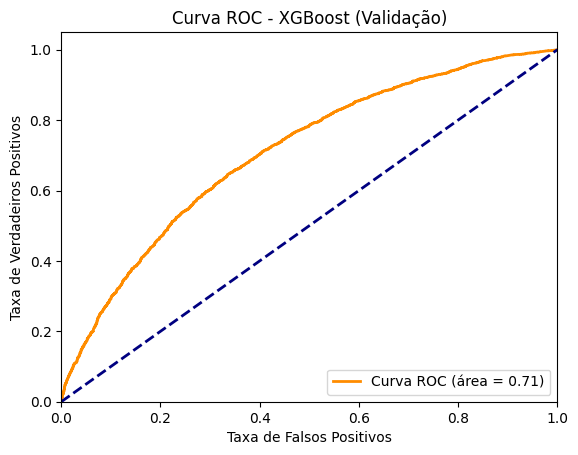

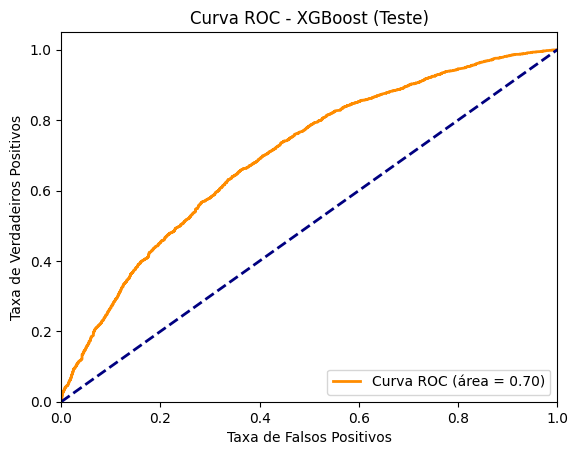

Train AUC-ROC: 0.7300827731287148
Validation AUC-ROC: 0.707813752913486
Test AUC-ROC: 0.6989127807981225


In [ ]:
# Definir hiperparâmetros para GridSearchCV
param_grid_xgb = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Configurar GridSearchCV com validação cruzada
grid_search = GridSearchCV(estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
                           param_grid=param_grid_xgb,
                           cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
                           scoring='roc_auc',
                           n_jobs=-1,
                           verbose=2)

# Treinar o modelo com GridSearchCV
grid_search.fit(X_train, y_train)
best_xgb_model = grid_search.best_estimator_

print(f"Best XGBoost model: {best_xgb_model}")

# Avaliar o modelo no conjunto de treinamento
y_train_pred_proba = best_xgb_model.predict_proba(X_train)[:, 1]
train_auc_roc = roc_auc_score(y_train, y_train_pred_proba)
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_proba)
roc_auc_train = auc(fpr_train, tpr_train)

# Avaliar o modelo no conjunto de validação
y_val_pred_proba = best_xgb_model.predict_proba(X_val)[:, 1]
val_auc_roc = roc_auc_score(y_val, y_val_pred_proba)
fpr_val, tpr_val, _ = roc_curve(y_val, y_val_pred_proba)
roc_auc_val = auc(fpr_val, tpr_val)

# Avaliar o modelo no conjunto de teste
y_test_pred_proba = best_xgb_model.predict_proba(X_test)[:, 1]
test_auc_roc = roc_auc_score(y_test, y_test_pred_proba)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_proba)
roc_auc_test = auc(fpr_test, tpr_test)

# Plotar a curva ROC para o conjunto de treinamento
plt.figure()
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc_train)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC - XGBoost (Treinamento)')
plt.legend(loc="lower right")
plt.show()

# Plotar a curva ROC para o conjunto de validação
plt.figure()
plt.plot(fpr_val, tpr_val, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc_val)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC - XGBoost (Validação)')
plt.legend(loc="lower right")
plt.show()

# Plotar a curva ROC para o conjunto de teste
plt.figure()
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC - XGBoost (Teste)')
plt.legend(loc="lower right")
plt.show()

print(f"Train AUC-ROC: {train_auc_roc}")
print(f"Validation AUC-ROC: {val_auc_roc}")
print(f"Test AUC-ROC: {test_auc_roc}")

Com a adição do gridsearch com cross-validation, houve uma pequena melhora no conjunto de teste e validação, de 0.001 aproximadamente.

Tentamos a tecnica de baggin, mas houve uma pequena piora no modelo, então decidimos seguir sem ela.

Por fim, vamos tentar adicionar ainda mais dados para ver se ainda há espeço para melhoras no modelo.

In [ ]:
df_selected_routes_grande = df_voos_realizados [
    ((df_voos_realizados['Origin'] == 'LAX') & (df_voos_realizados['Dest'] == 'SFO')) |
    ((df_voos_realizados['Origin'] == 'MCO') & (df_voos_realizados['Dest'] == 'ATL')) |
    ((df_voos_realizados['Origin'] == 'DEN') & (df_voos_realizados['Dest'] == 'PHX')) |
    ((df_voos_realizados['Origin'] == 'ATL') & (df_voos_realizados['Dest'] == 'FLL')) |
    ((df_voos_realizados['Origin'] == 'SEA') & (df_voos_realizados['Dest'] == 'PDX')) |
    ((df_voos_realizados['Origin'] == 'JFK') & (df_voos_realizados['Dest'] == 'LAX')) |
    ((df_voos_realizados['Origin'] == 'SLC') & (df_voos_realizados['Dest'] == 'DEN')) |
    ((df_voos_realizados['Origin'] == 'SFO') & (df_voos_realizados['Dest'] == 'LAX')) |
    ((df_voos_realizados['Origin'] == 'LAX') & (df_voos_realizados['Dest'] == 'LAS')) |
    ((df_voos_realizados['Origin'] == 'DEN') & (df_voos_realizados['Dest'] == 'LAX')) |
    ((df_voos_realizados['Origin'] == 'SEA') & (df_voos_realizados['Dest'] == 'SFO')) |
    ((df_voos_realizados['Origin'] == 'LAS') & (df_voos_realizados['Dest'] == 'SEA'))
]

In [ ]:
from sklearn.preprocessing import StandardScaler

df_selected_routes_grande = df_selected_routes_grande[df_selected_routes_grande["DepDelayMinutes"] <= 30]

df_voos_realizados = df_voos_realizados[df_voos_realizados["DepDelayMinutes"] <= 30]
bins = [-1, 0, 30]
labels = ['Sem Atraso', 'Atraso Leve']

df_selected_routes_grande['CategoriaAtraso'] = pd.cut(df_selected_routes_grande['DepDelayMinutes'], bins=bins, labels=labels)
df_voos_realizados['CategoriaAtraso'] = pd.cut(df_selected_routes_grande['DepDelayMinutes'], bins=bins, labels=labels)


In [ ]:
# Normalizar colunas específicas com z-score
cols_to_normalize = ['Month', 'DayofMonth', 'DayOfWeek']
scaler = StandardScaler()
df_selected_routes_grande[cols_to_normalize] = scaler.fit_transform(df_selected_routes_grande[cols_to_normalize])

# Codificar colunas categóricas
df_selected_routes_grande = pd.get_dummies(df_selected_routes_grande, columns=['Airline', 'Origin', 'Dest'], drop_first=True)

# Selecionar features e variável alvo
X = df_selected_routes_grande.drop(columns=['CategoriaAtraso', 'FlightDate', 'OriginCityName', 'DestCityName', 'DepDelayMinutes'])
y = df_selected_routes_grande['CategoriaAtraso']

# Codificar as classes de 'y' como valores numéricos
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Dividir os dados em conjuntos de treinamento, validação e teste com estratificação
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

Train AUC-ROC for XGBoost: 0.7277363300650855
Validation AUC-ROC for XGBoost: 0.7078962406746341
Test AUC-ROC for XGBoost: 0.7102254513918952


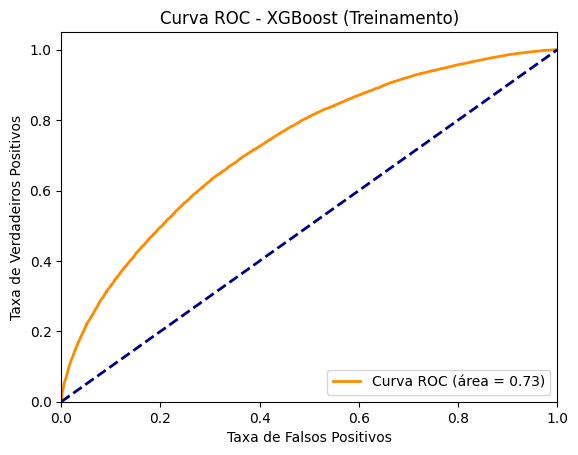

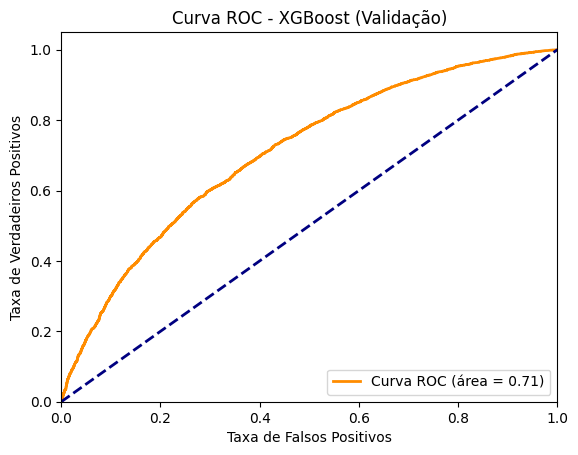

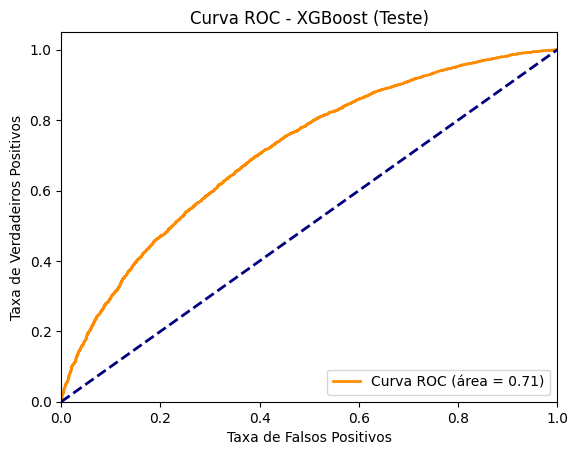

In [ ]:
# Treinar o modelo XGBoost
best_xgb_model = XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss')
best_xgb_model.fit(X_train, y_train)

# Avaliar o modelo no conjunto de treinamento
y_train_pred_proba = best_xgb_model.predict_proba(X_train)[:, 1]
train_auc_roc = roc_auc_score(y_train, y_train_pred_proba)
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_proba)
roc_auc_train = auc(fpr_train, tpr_train)
print(f"Train AUC-ROC for XGBoost: {train_auc_roc}")

# Avaliar o modelo no conjunto de validação
y_val_pred_proba = best_xgb_model.predict_proba(X_val)[:, 1]
val_auc_roc = roc_auc_score(y_val, y_val_pred_proba)
fpr_val, tpr_val, _ = roc_curve(y_val, y_val_pred_proba)
roc_auc_val = auc(fpr_val, tpr_val)
print(f"Validation AUC-ROC for XGBoost: {val_auc_roc}")

# Avaliar o modelo no conjunto de teste
y_test_pred_proba = best_xgb_model.predict_proba(X_test)[:, 1]
test_auc_roc = roc_auc_score(y_test, y_test_pred_proba)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_proba)
roc_auc_test = auc(fpr_test, tpr_test)
print(f"Test AUC-ROC for XGBoost: {test_auc_roc}")

# Plotar a curva ROC para o conjunto de treinamento
plt.figure()
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc_train)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC - XGBoost (Treinamento)')
plt.legend(loc="lower right")
plt.show()

# Plotar a curva ROC para o conjunto de validação
plt.figure()
plt.plot(fpr_val, tpr_val, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc_val)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC - XGBoost (Validação)')
plt.legend(loc="lower right")
plt.show()

# Plotar a curva ROC para o conjunto de teste
plt.figure()
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC - XGBoost (Teste)')
plt.legend(loc="lower right")
plt.show()

Dessa forma, conseguimos uma boa melhoria, com todas as medidas AOC-ROC maior do que 7, e a diferença entre teste e treinamento próxima de 0. Concluímos assim, que este é um modelo satisfatório e sem Overfitting.

# Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


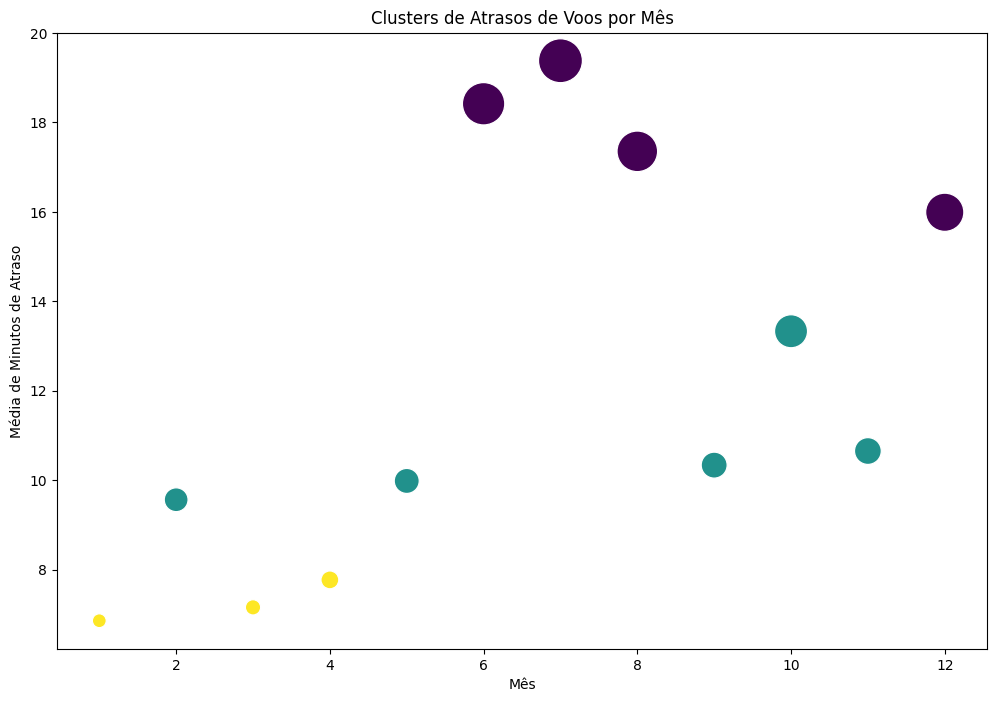

    Month  DepDelayMinutes  DepDelayMinutes_scaled  Cluster
0       1         6.854505               -1.244867        2
1       2         9.561253               -0.618256        1
2       3         7.153696               -1.175604        2
3       4         7.768263               -1.033332        2
4       5         9.981683               -0.520927        1
5       6        18.419074                1.432325        0
6       7        19.381983                1.655238        0
7       8        17.354805                1.185947        0
8       9        10.335027               -0.439128        1
9      10        13.330231                0.254260        1
10     11        10.650734               -0.366042        1
11     12        15.991687                0.870386        0


In [ ]:
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.preprocessing import StandardScaler

atrasos_por_mes = df_voos_realizados.groupby('Month').agg({'DepDelayMinutes': 'mean'}).reset_index()

# Normalizar a coluna 'DepDelayMinutes'
scaler = StandardScaler()
atrasos_por_mes['DepDelayMinutes_scaled'] = scaler.fit_transform(atrasos_por_mes[['DepDelayMinutes']])

# Aplicar K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
atrasos_por_mes['Cluster'] = kmeans.fit_predict(atrasos_por_mes[['DepDelayMinutes_scaled']])

# Visualizar os clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=atrasos_por_mes, x='Month', y='DepDelayMinutes', hue='Cluster', palette='viridis', size='DepDelayMinutes', sizes=(100, 1000), legend=None)
plt.title('Clusters de Atrasos de Voos por Mês')
plt.xlabel('Mês')
plt.ylabel('Média de Minutos de Atraso')
plt.show()

# Analisar os resultados
print(atrasos_por_mes)